<center><h1>Literacy Attainment of Native- and Foreign-born Children - Analysis</h1></center> 

# Introduction

I have been concerned with the Syrian Civil War and the ensuing refugee crisis, since the start of the conflict in 2011 when I was a student of Arabic at University of Edinburgh. Since then, I have worked directly with displaced people from this and other conflicts in Egypt, Lebanon and Greece. Whilst working with unaccompanied asylum-seeking children in Greece, I observed first hand the country's struggles to integrate asylum-seeking children into its national school system, and ultimately focused on this for my [Master's dissertation](https://sophieespencer.wordpress.com/2019/09/02/growth-unlocked/). In this dissertation, I identified the specific learning needs of refugee and asylum-seeking children as psycho-social support, protection from discrimination and bullying, and language acquisiton support. I also reviewed how other countries with high numbers of asylum-seeking children were addressing this challenge. 

Subsequently, I wanted to undertake a comparative investigation of countries with high numbers of asylum-seeking children to understand which countries were most successful at integrating foreign-born children into their national school systems. In the following analysis, I use data from the IEA’s Progress in International Reading Literacy Study 2021 (PIRLS 2021), an international assessment of fourth-grade students’ reading abilities conducted across 57 countries, to assess literacy outcomes for native and foreign-born children across nine countries with significant refugee populations. 

The goal of this study is to serve as a preliminary quantitative investigation to identify countries that demonstrate best practice in integrating foreign-born children into their national school systems, so that further targeted investigations into successful policies and practices can be made. 

## Research Questions

This study is guided by the following research questions:

- How do average literacy scores compare across countries with significant refugee populations?

- Are there significant differences in literacy scores between native- and foreign-born children in these countries?

- How does the age at which foreign-born children arrive in a host country affect their literacy outcomes?

## Limitations

The purpose of this study is to serve as a preliminary investigation into countries that have successfully integrated foreign-born children into national school systems. Further research is needed before the trends identified here can be accepted as accurate, particularly given the small sample sizes used in this assessment. Additionally, the study's quantitative nature does not allow for a more in-depth exploration of the realities of learning environments.

# Data and Methodology

## About PIRLS

PIRLS (Progress in International Reading Literacy Study) is a global assessment of reading proficiency among fourth graders, conducted every five years since its inception in 2001. In the 2021 cycle, nearly 400,000 children from 57 countries participated. Beyond reading assessments, PIRLS includes context questionnaires for students, parents, teachers, and schools, offering invaluable insights into the realities of learning environments.

For more information on PIRLS, please see [here.](https://www.iea.nl/studies/iea/pirls)

## Data Compiling, Cleaning and Filtering

The data for this analysis was downloaded  [here](https://pirls2021.org/data/) as separate SPSS files, categorized by questionnaire type and country.

After an initial review of the available data files, I selected specific files, converted them to Excel format, and concatenated them into a single dataset. This combined dataset was then cleaned and filtered for analysis and exported to excel as 'cleandataiqr17125.xlsx'.

To view the data preparation processes in detail, please <a href="https://github.com/SophieESpencer/Comparison/tree/main/Final%20Notebooks">click here</a>.
 

## Importing the Data and Relevant Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandataiqr17125.xlsx', index_col=0)

## Organising and Categorising Data Columns

During the cleaning process, I used the following groupings of columns to help understand the data:

In [3]:
main_variables = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
feelings_in_school_columns = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
experiences_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

- main_variables: Country and nativity status.
- demographic_info_columns: These columns primarily come from the Home Context Survey, which was answered by parents. 
- feelings_in_school_columns: These columns reflect children’s self-reported feelings about school.
- experiences_in_school_columns: This set of columns relates to children's self-reported experiences, particularly focusing on the frequency of negative experiences.
- assessment_score_columns: These columns contain the literacy and reading test scores from the PIRLS assessment.


I will now analyse this cleaned dataset to produce visualisations which will help to provide answers to these research questions:

- How do average literacy scores compare across countries with significant refugee populations?

- Are there significant differences in literacy scores between native- and foreign-born children in these countries?

- How does the age at which foreign-born children arrive in a host country affect their literacy outcomes?

 

# Data Analysis and Observations

## Ranking Countries by Average Literacy Score

To start, I will use the 'avgscore' column, which was generated during the cleaning stage, to compare average scores across countries. Please note that I applied interquartile range (IQR) filtering in the previous stage, so I am confident in the validity of this data.

In [4]:
df_avg_pivot = (
    df.pivot_table(values="avgscore", index="Country")
    .sort_values(by="avgscore", ascending=False)
)

<Figure size 864x432 with 0 Axes>

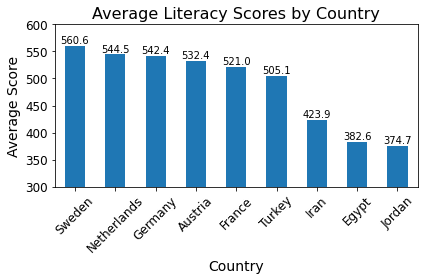

In [5]:
plt.figure(figsize=(12, 6))

ax = df_avg_pivot.plot(kind='bar', legend=False)

plt.title('Average Literacy Scores by Country', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(300, 600)

for i, value in enumerate(df_avg_pivot['avgscore']):
    plt.text(i, value + 5, f'{value:.1f}', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Observations

- Sweden stands out with the highest average scores, followed by Netherlands, Germany, and Austria, all of which have average scores above 500. France and Turkey also perform well, with average scores slightly above 500. Jordan records the lowest average score, with Egypt and Iran falling in between.

- As expected, the higher-achieving countries—Sweden, Netherlands, Germany, Austria, and France—are Western European nations with high GDPs. 

- Turkey and Jordan are upper-middle-income countries, while Iran and Egypt are classified as lower-middle-income countries. Despite being a middle-income country, Turkey outperforms others by a significant margin.

- Interestingly, Egypt outperforms Jordan in literacy, despite Jordan having a higher GDP and being classified as an upper-middle-income country.

Next, I will investigate whether there is a disparity in assessment scores between native-born and foreign-born children across these countries. 

## Comparing Assessment Scores of Native- and Foreign-Born Children

Firstly, I want to preserve the country ranking generated by the first bar chart.

In [6]:
country_order = df_avg_pivot.reset_index()["Country"].to_list()

Next, I will plot a barchart that shows the separate average scores for native and foreign-born children across countries.

In [7]:
pivot_native_foreign = df.pivot_table(
    values='avgscore', 
    index='Country', 
    columns='ASBH02A', 
    aggfunc='mean'
).reset_index()

In [8]:
pivot_native_foreign["Country"] = pd.Categorical(
    pivot_native_foreign["Country"], categories=country_order, ordered=True
)
pivot_native_foreign = pivot_native_foreign.sort_values(by='Country')

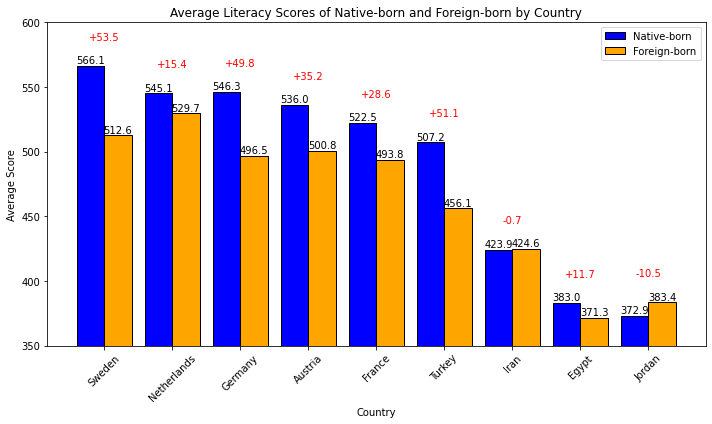

In [9]:
countries = pivot_native_foreign['Country']
native_scores = pivot_native_foreign['native_born']
foreign_scores = pivot_native_foreign['foreign_born']
differences = native_scores - foreign_scores

plt.figure(figsize=(10, 6))

bar_width = 0.4

x = np.arange(len(countries))

plt.ylim(350, 600)

plt.bar(
    x - bar_width / 2,
    native_scores,
    width=bar_width,
    alpha=1,
    color="blue",
    edgecolor="black",
    label="Native-born",
)

plt.bar(
    x + bar_width / 2,
    foreign_scores,
    width=bar_width,
    alpha=1,
    color="orange",
    edgecolor="black",
    label="Foreign-born",
)

for i, (native, foreign, diff) in enumerate(zip(native_scores, foreign_scores, differences)):
    taller_y = max(native, foreign)
    plt.text(
        x[i],
        taller_y + 20,  
        f"{diff:+.1f}",  
        ha="center",
        fontsize=10,
        color="red",
    )

    plt.text(
        x[i] - bar_width / 2,
        native + 2,  
        f"{native:.1f}",
        ha="center",
        fontsize=10,
        color="black",
    )

    plt.text(
        x[i] + bar_width / 2,
        foreign + 2, 
        f"{foreign:.1f}",
        ha="center",
        fontsize=10,
        color="black",
    )

plt.xticks(x, countries, rotation=45)
plt.xlabel("Country")
plt.ylabel("Average Score")
plt.title("Average Literacy Scores of Native-born and Foreign-born by Country")
plt.legend()
plt.tight_layout()

plt.show()


### Observations

#### Country Rankings and Disparities Between Native- and Foreign-Born Children
- Sweden tops the leaderboard for average scores across all children. However, when focusing on foreign-born students, Netherlands takes first place, with a 17.1-point lead over foreign-born students in Sweden.

- Despite Germany being third in overall scores, it ranks fourth for foreign-born students, behind Austria, which holds third place.

- Sweden and Germany outperform Netherlands and Austria in overall literacy scores, yet Netherlands and Austria excel when it comes to foreign-born children's results.

- At the bottom of the leaderboard, foreign-born Jordanian students rank eighth, with Egyptian students in ninth, despite these countries being in reverse positions in the ranking for overall scores.

#### Native vs. Foreign-Born Performance
- Native-born children outperform their foreign-born peers in every country except for Iran and Jordan.

- The countries with the largest disparities between native and foreign-born children are Sweden, Turkey, and Germany, where native-born students score 53.5, 51.1, and 49.8 points higher, respectively.

- The Netherlands has the smallest disparity between native and foreign-born children among high-income countries, with an average difference of just 15.4 points.

- In Iran, foreign-born children actually score 0.7 points higher than native-born peers, indicating a reversal of the trend observed in most other countries.

- While Turkey stands out with a large disparity, middle-income countries tend to have smaller gaps. This may be attributed to shared languages among foreign-born and native-born students in countries like Iran, Egypt, and Jordan.

- Jordan is an intriguing case, where foreign-born students score 10.5 points higher than native-born students. This could be due to the large refugee population in Jordan, with Syrian children classified as foreign-born and Palestinian children as native-born.

#### Summary

The Netherlands leads the way in achieving high scores for foreign-born students, even surpassing the performance of native-born children in other high-income countries. Understanding the methods and strategies employed in Dutch schools could provide valuable insights into how educational systems can support foreign-born children effectively.

This analysis has also revealed interesting trends in middle-income countries, where, apart from Turkey, disparities between native and foreign-born children tend to be smaller. This could be attributed to factors like shared languages among students or different educational integration practices.

Additionally, certain contextual factors, such as refugee status and language barriers, may help explain the varying performance trends, especially in countries like Jordan and Turkey.

In the next stages, the analysis will focus on how the age of arrival affects the literacy outcomes for foreign-born children, providing a deeper understanding of the integration process.

## The Effect of Age of Arrival on Assessment Scores

Now  I want to investigate how the age of arrival in a country affects literacy scores. 

In [10]:
pivot_minage_literacy = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [11]:
pivot_minage_literacy = pivot_minage_literacy.reindex(country_order)

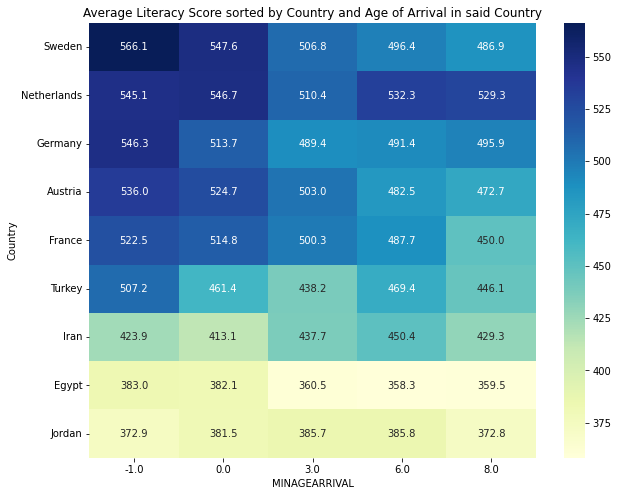

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_minage_literacy, annot=True,fmt=".1f", cmap='YlGnBu')
plt.title('Average Literacy Score sorted by Country and Age of Arrival in said Country')
plt.show()

### Observations

#### Age of Arrival Effect on Scores
The hypothesis is that the older a child arrives in a new country, the more difficult it becomes to assimilate. This may be due to language barriers, both for the child and their parents.

However, this hypothesis only holds true in Sweden, Austria, and France, where we observe a gradual decrease in attainment the older the children arrive in the country. In these countries, native students tend to perform the best.

In contrast, Netherlands, Germany, and Turkey show that children who arrived between the ages of 3 and 6 perform the worst overall. These children, being 10 years old in 2021, would have arrived between 2014 and 2017. This could be reflecting these countries' challenges in accommodating a significant influx of foreign-born children during that period.

#### Netherlands: High Performance of Foreign-Born Children
As we saw in the previous visualization, Netherlands appears to be doing something right with foreign-born children. Here are some key observations:

- Foreign-born children arriving under the age of 3 in the Netherlands outperform all their peers, including native-born peers, by a small margin.

- Foreign-born children arriving after the age of 8 in the Netherlands perform very well, even surpassing native-born children in countries like France, Turkey, Iran, Jordan, and Egypt.

#### Summary
The Netherlands stands out as outperforming all other countries in terms of supporting foreign-born children. To better understand the results, it would be useful to corroborate this data with more detailed age arrival information, as some children may have been held back in school, which could influence their current performance (for example, not all children may be 10 years old in 2021).

Additionally, we should consider the sample sizes for non-native children, as they may be relatively small. This will be explored further in the next stage.

### Sample Sizes

In [13]:
pivot_minagearrival_counts = df.pivot_table(
    index=['Country'],
    columns=['MINAGEARRIVAL'],
    aggfunc='size',
)

In [14]:
pivot_minagearrival_counts

MINAGEARRIVAL,-1.0,0.0,3.0,6.0,8.0
Country,,,,,
Austria,4025,123,175,91,59
Egypt,6992,113,42,39,25
France,4526,81,71,49,25
Germany,2317,53,75,36,32
Iran,5689,40,15,19,16
Jordan,4731,501,280,101,27
Netherlands,1947,26,16,18,11
Sweden,2681,82,108,74,39
Turkey,5366,89,70,53,15


Given the above small sample sizes, a further investigation into these students would be useful. For example, in the Netherlands there were only 11 foreign-born students who arrived after the age of 8 in the study. It would be useful to explore whether these students are from the same school or region, to understand the reasons for their success.

# Discussion

#### Interpreting the Findings
As expected, high-income countries outperform middle-income countries in overall literacy assessment scores, with Sweden leading and Jordan in last place. Notably, Turkey performs significantly better than the other middle-income countries included in this study.

When analysing native- and foreign-born children separately, significant shifts in rankings are evident. The Netherlands, despite being second in overall scores, ranks first for foreign-born children, outperforming Sweden. High-income countries and notably, Sweden and Germany, show significant disparities between native- and foreign-born students, while middle-income countries generally exhibit smaller gaps. In fact, foreign-born children outperform their native-born peers in Iran and Jordan. Turkey, however, shows a larger disparity than the other middle-income countries included in the study and this may be due to linguistic differences between native and foreign-born children in that country.

Age-of-arrival data reveals further noteworthy findings, particularly the Netherlands' success in integrating foreign-born students at older ages. Even those arriving after age eight achieve strong scores, surpassing native-born peers in middle-income countries and France. Surprisingly, in the Netherlands, Germany, and Turkey, children arriving between ages 3 and 6 perform the worst. This may reflect challenges in accommodating an influx of foreign-born students between 2014 and 2017 when most of these children would have arrived.

#### Policy Implications

The findings suggest a need to investigate the policies creating these outcomes. The Netherlands should serve as a case study to understand successful integration practices for foreign-born children, compared to the Swedish strategy. Similarly, Austria's relatively stronger outcomes for foreign-born students compared to Germany suggest a need for a closer examination of their respective policies.

#### Limitations of the Analysis

As demonstrated above, despite large overall sample sizes, the samples of foreign-born children are small and this is particularly pronounced for subcategories like age of arrival. This may affect the reliability of trends observed. It would therefore be beneficial to further investigate these groupings, in order to understand whether they are reflective of broader national trends and policies. 

Additionally, this analysis is not able to divide foreign-born children into nationality, linguistic, or immigration status groupings - factors which could influence their literacy outcomes. 

# Conclusion

This study demonstrates that equal wealth levels do not necessarily result in equal literacy outcomes, particularly for foreign-born children. It highlights the need for continued investigation into best practices in literacy education and the integration of foreign-born students. According to the data examined here, the Netherlands provides a striking example of what can be achieved within a short period, even for children arriving after the age of eight. This phenomenon certainly warrants further investigation. 

To build on this study, future research should explore these research questions:

- How do the literacy outcomes of these countries compare to international benchmarks?
- How do the literacy outcomes of these countries evolve over time in past and future PIRLS assessments?
- How do other demographic factors, including gender, parents' occupation and education level, influence literacy outcomes?
- How do the self-reported happiness levels of native and foreign-born children compare and are they reflective of literacy outcomes?

It is essential that children who arrive in host countries have access to quality literacy education—not only to succeed in the workforce, but to fully exercise their agency as global citizens and to experience the personal joys of the written word. With growing displacement trends across the world, continued research into literacy education and the integration of foreign-born students is crucial so that children on the move develop the skills they need to thrive in this increasingly uncertain world. 

# References

IEA’s Progress in International Reading Literacy Study – PIRLS 2021 Copyright © 2023 International Association for the Evaluation of Educational Achievement (IEA). Publisher: TIMSS & PIRLS International Study Center, Lynch School of Education and Human Development, Boston College.